<a href="https://colab.research.google.com/github/vamsigp/EIP-4/blob/master/wk-2/Ninth_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment - 2**

Design a CNN model to solve MNIST digits dataset

Constraints - 
1.   99.4% Accuracy
2.   < 15k Parameters
3. <= 20 epochs
4. no Fully connected Layer
5. No biases should be used




Steps done to achieve desired Accuracy - 


*   Architecture same as Eight_DNN notebook
*   Modified last 3 num of filters  of the convolution layers
*   Added one more convolution layer with lesser number of filters
*   Modified Learning rate(slightly decreased creased from [*this value is denominator 0.319 to 0.32*])

As GlobalAverage pooling introduced in the class, tried replacing the last Flatten layer with GAP layer and ran the simulation. Am not sure if thats the correct way or not.

For evaluation only "***model***" needs to be considered.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
random_image_id = np.random.randint(low=0, high=len(X_train), dtype='int64')

(60000, 28, 28)


Text(0.5, 1.0, '5')

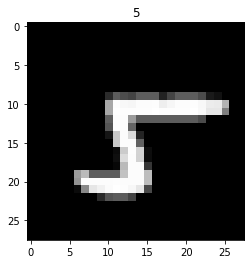

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[random_image_id], cmap='gray')
plt.title(y_train[random_image_id])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Create Model

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Conv2D(16, 3, activation='relu', use_bias=False,input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(32, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(10, 1, activation='relu', use_bias=False)) #24

model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Conv2D(16, 3, activation='relu', use_bias=False)) #10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(15, 3, activation='relu', use_bias=False)) #8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(14, 3, activation='relu', use_bias=False)) #6
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(13, 3, activation='relu', use_bias=False)) #4
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(10, 4, use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.32 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 10s 170us/step - loss: 0.5491 - acc: 0.8463 - val_loss: 0.1194 - val_acc: 0.9793
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022727273.
60000/60000 [==============================] - 7s 120us/step - loss: 0.2585 - acc: 0.9222 - val_loss: 0.0567 - val_acc: 0.9874
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018292683.
60000/60000 [==============================] - 7s 122us/step - loss: 0.2034 - acc: 0.9393 - val_loss: 0.0411 - val_acc: 0.9911
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015306122.
60000/60000 [==============================] - 7s 119us/step - loss: 0.1724 - acc: 0.9459 - val_loss: 0.0409 - val_acc: 0.9909
Epoch 5/

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.01946080807595281, 0.9942]


### Using Global Average Pooling

In [0]:
from keras.layers import AveragePooling2D, GlobalAveragePooling2D

In [0]:
from keras.layers import Activation
model_ga = Sequential()
 
model_ga.add(Conv2D(16, 3, activation='relu', use_bias=False,input_shape=(28,28,1))) #26
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))

model_ga.add(Conv2D(32, 3, activation='relu', use_bias=False)) #24
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))

model_ga.add(Conv2D(10, 1, activation='relu', use_bias=False)) #24

model_ga.add(MaxPooling2D(pool_size=(2, 2))) #12

model_ga.add(Conv2D(16, 3, activation='relu', use_bias=False)) #10
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))


model_ga.add(Conv2D(15, 3, activation='relu', use_bias=False)) #8
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))


model_ga.add(Conv2D(14, 3, activation='relu', use_bias=False)) #6
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))


model_ga.add(Conv2D(13, 3, activation='relu', use_bias=False)) #4
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))


model_ga.add(Conv2D(10, 4, use_bias=False))
model_ga.add(BatchNormalization())
model_ga.add(Dropout(0.1))

model_ga.add(GlobalAveragePooling2D())
# model_ga.add(Flatten())
model_ga.add(Activation('softmax'))

In [0]:
model_ga.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 10)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.32 * epoch), 10)

model_ga.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
model_ga.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 153us/step - loss: 0.5503 - acc: 0.8448 - val_loss: 0.0826 - val_acc: 0.9838
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022727273.
60000/60000 [==============================] - 7s 122us/step - loss: 0.2543 - acc: 0.9249 - val_loss: 0.0595 - val_acc: 0.9896
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018292683.
60000/60000 [==============================] - 7s 123us/step - loss: 0.2044 - acc: 0.9373 - val_loss: 0.0445 - val_acc: 0.9904
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015306122.
60000/60000 [==============================] - 7s 122us/step - loss: 0.1779 - acc: 0.9444 - val_loss: 0.0434 - val_acc: 0.9895
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013157895.
60000/60000 [======

In [0]:
score = model_ga.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.020457593263906892, 0.9939]
